In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [3]:

import io
from google.colab import files
uploaded = files.upload()

Saving final2.csv to final2.csv


In [4]:
df = pd.read_csv('final2.csv')
df.head()

,Date,ExternalTemp1,Humidity,Pressure,Temperature
0,8/20/2022 2:03,19.4,81,1008.100,17.9
1,8/20/2022 2:13,19.4,81,1008.001,17.9
2,8/20/2022 2:23,19.3,81,1007.877,17.9
3,8/20/2022 2:33,19.3,81,1007.949,17.8
4,8/20/2022 2:53,19.3,81,1007.808,18.0


In [5]:
df.head()

,Date,ExternalTemp1,Humidity,Pressure,Temperature
0,8/20/2022 2:03,19.4,81,1008.100,17.9
1,8/20/2022 2:13,19.4,81,1008.001,17.9
2,8/20/2022 2:23,19.3,81,1007.877,17.9
3,8/20/2022 2:33,19.3,81,1007.949,17.8
4,8/20/2022 2:53,19.3,81,1007.808,18.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29615 entries, 0 to 29614
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           29615 non-null  object 
 1   ExternalTemp1  29615 non-null  float64
 2   Humidity       29615 non-null  int64  
 3   Pressure       29615 non-null  float64
 4   Temperature    29615 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df.describe()

,ExternalTemp1,Humidity,Pressure,Temperature
count,29615.000000,29615.000000,29615.000000,29615.000000
mean,4.362141,90.754280,1008.147858,4.995911
std,6.033541,7.286023,13.002553,6.604632
min,-10.100000,43.000000,967.296000,-14.800000
25%,0.000000,87.000000,998.882500,0.400000
50%,0.000000,94.000000,1008.827000,4.400000
75%,9.800000,96.000000,1017.033500,10.000000
max,23.500000,100.000000,1036.731000,32.300000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

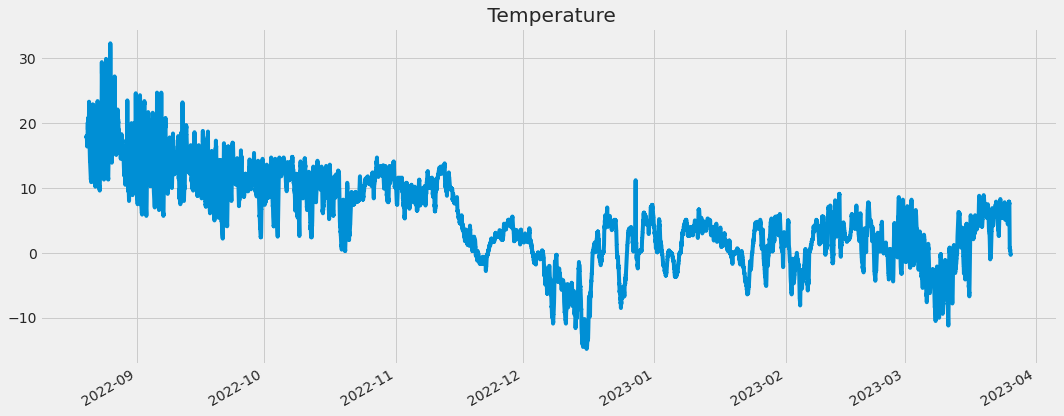

In [9]:
plt.figure(figsize=(15, 6))
df['Temperature'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title(" Temperature")
plt.tight_layout()
plt.show()

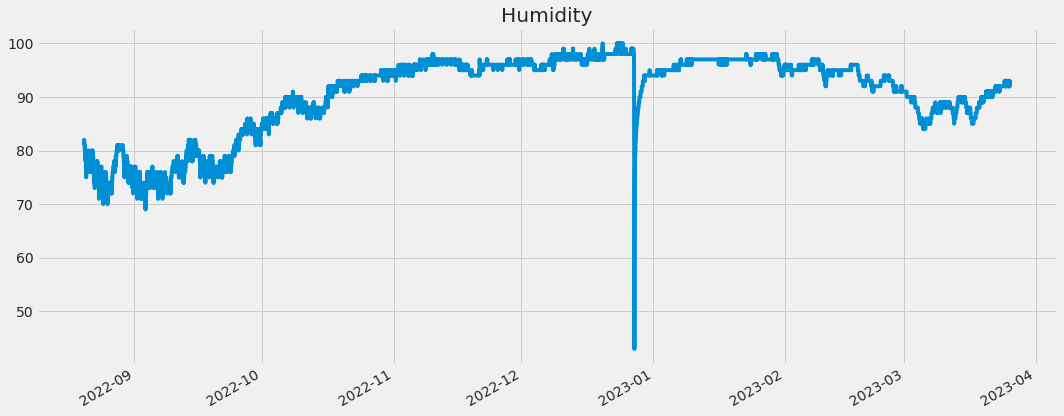

In [10]:
plt.figure(figsize=(15, 6))
df['Humidity'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Humidity")
plt.tight_layout()
plt.show()

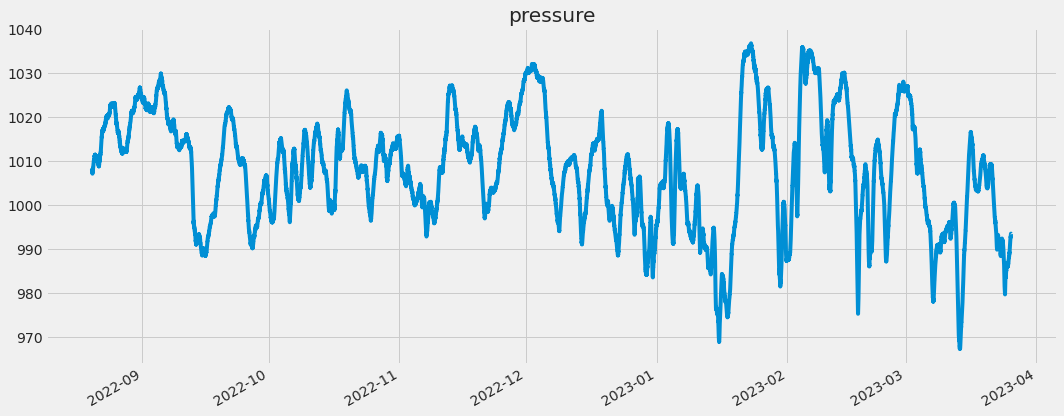

In [11]:
plt.figure(figsize=(15, 6))
df['Pressure'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("pressure")
plt.tight_layout()
plt.show()

In [12]:
n_cols = 1
dataset = df["Temperature"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(29615, 1)

# Normalizing Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

# splitting Data

In [14]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 22211 Test Size : 7404


In [15]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(22211, 1)

# creating training set

In [16]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.69426752],
       [0.69426752],
       [0.69426752],
       [0.69214437],
       [0.69639066],
       [0.69426752],
       [0.69639066],
       [0.69639066],
       [0.69426752],
       [0.69639066],
       [0.69426752],
       [0.69639066],
       [0.69639066],
       [0.69639066],
       [0.69426752],
       [0.69426752],
       [0.69426752],
       [0.69426752],
       [0.69426752],
       [0.69214437],
       [0.69002123],
       [0.68789809],
       [0.6836518 ],
       [0.68152866],
       [0.67940552],
       [0.67728238],
       [0.66878981],
       [0.66454352],
       [0.66454352],
       [0.66242038],
       [0.66454352],
       [0.66666667],
       [0.67091295],
       [0.67303609],
       [0.67515924],
       [0.67728238],
       [0.68152866],
       [0.68789809],
       [0.6985138 ],
       [0.69426752],
       [0.69214437],
       [0.69214437],
       [0.69639066],
       [0.70488323],
       [0.71125265],
       [0.7133758 ],
       [0.72399151],
  

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [19]:
x_train.shape , y_train.shape

((29555, 60, 1), (29555, 1))

# LSTM model

In [20]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [23]:
history = model.fit(x_train, y_train, epochs= 50, batch_size= 32)

Epoch 1/50
924/924 [==============================] - 68s 74ms/step - loss: 2.4191e-04 - mean_absolute_error: 0.0102
Epoch 2/50
924/924 [==============================] - 70s 75ms/step - loss: 9.8819e-05 - mean_absolute_error: 0.0065
Epoch 3/50
924/924 [==============================] - 71s 77ms/step - loss: 6.0158e-05 - mean_absolute_error: 0.0052
Epoch 4/50
924/924 [==============================] - 71s 77ms/step - loss: 4.8974e-05 - mean_absolute_error: 0.0047
Epoch 5/50
924/924 [==============================] - 72s 78ms/step - loss: 4.5402e-05 - mean_absolute_error: 0.0048
Epoch 6/50
924/924 [==============================] - 72s 78ms/step - loss: 3.6503e-05 - mean_absolute_error: 0.0042
Epoch 7/50
924/924 [==============================] - 71s 77ms/step - loss: 3.4501e-05 - mean_absolute_error: 0.0041
Epoch 8/50
924/924 [==============================] - 73s 79ms/step - loss: 3.0188e-05 - mean_absolute_error: 0.0038
Epoch 9/50
924/924 [==============================] - 72s 78ms/s

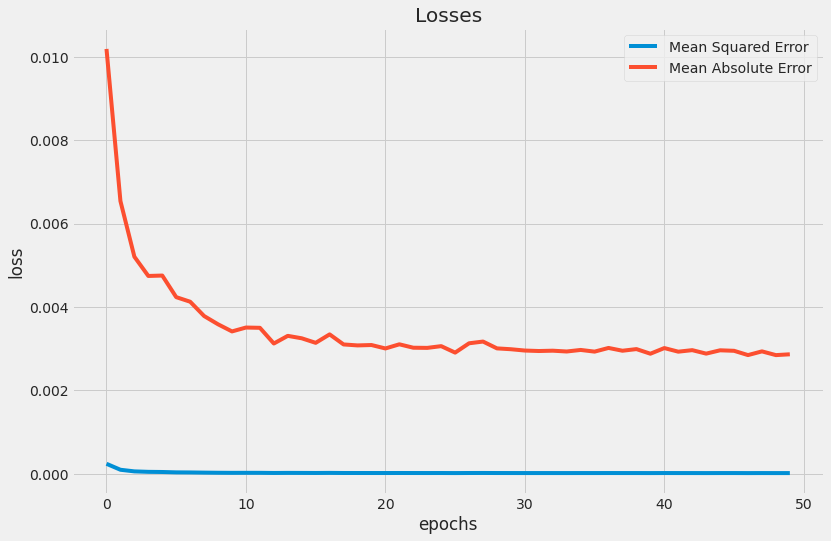

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Prediction

In [25]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [26]:
predictions = model.predict(x_test)

232/232 [==============================] - 7s 23ms/step


In [27]:
predictions.shape

(7404, 1)

In [28]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7404, 1)

In [29]:
y_test = scaler.inverse_transform(y_test)

In [30]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.08

In [31]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,0.431512,0.5
1,0.430785,0.5
2,0.431251,0.3
3,0.151296,0.3
4,0.194033,0.3
...,...,...
7399,-0.299003,-0.2
7400,-0.283318,-0.2
7401,-0.279268,-0.2
7402,-0.277100,-0.3


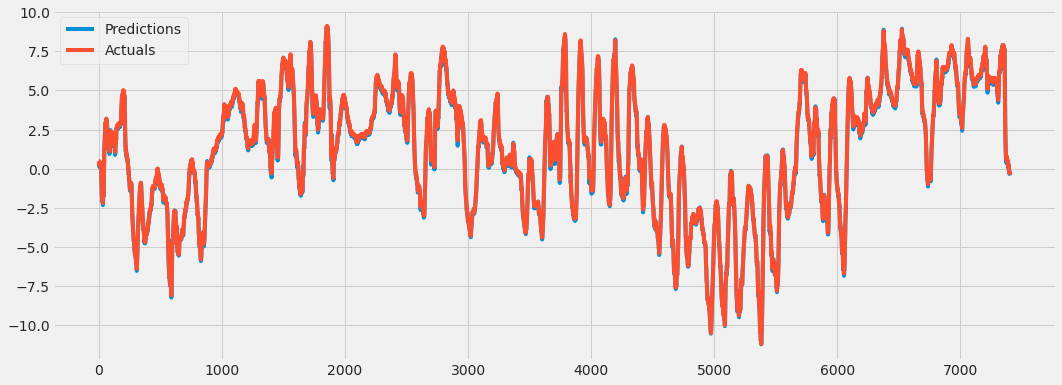

In [32]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

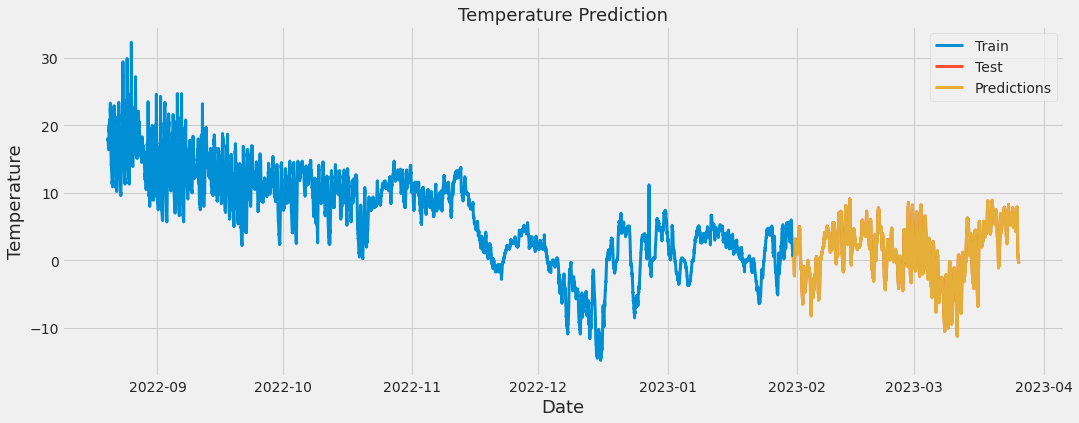

In [34]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['Temperature'], linewidth= 3)
plt.plot(test['Temperature'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])